# **Audio Preprocessing with Librosa**

In [6]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt


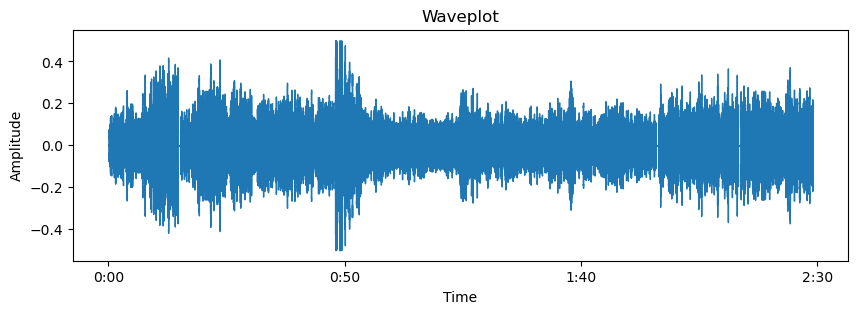

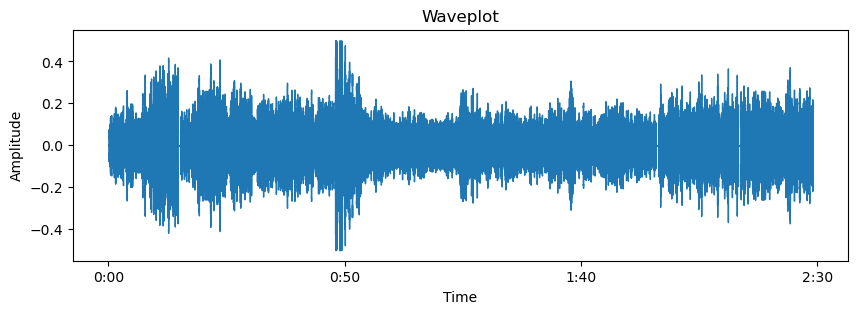

AttributeError: module 'matplotlib' has no attribute 'pyplot'

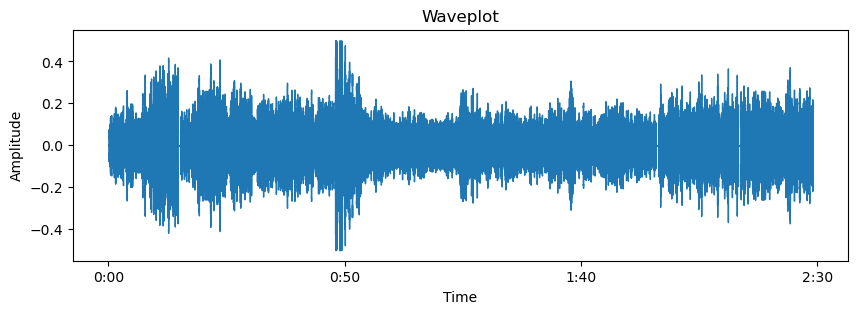

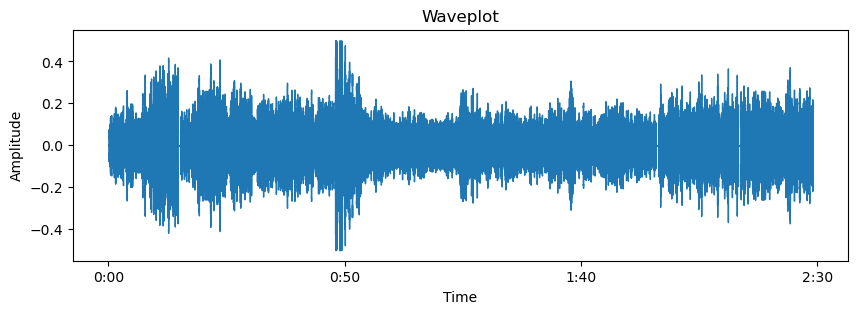

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [7]:
#waveform
aud="/home/katende/RECESS/AudioBad/Flask/All1/major/CRYVAR08.mp3"


signal,sr =librosa.load(aud,sr=22050)
plt.figure(figsize=(10, 3))
librosa.display.waveshow(signal,sr=sr)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Waveplot")
plt.show()




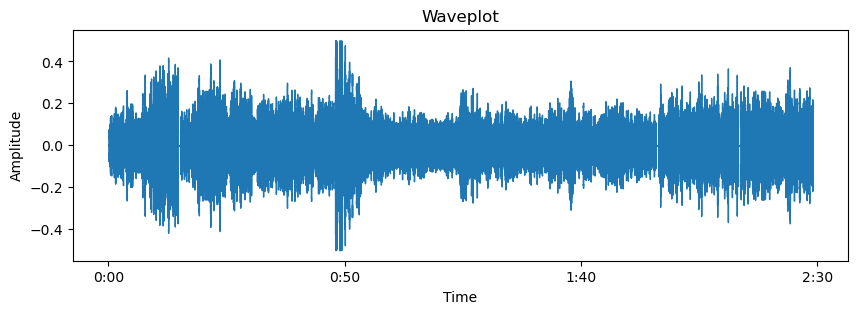

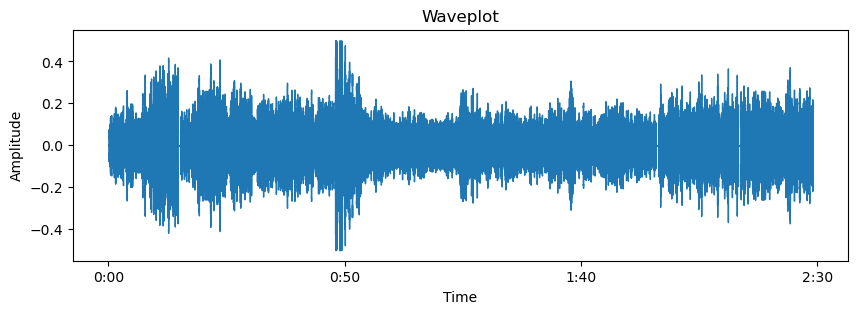

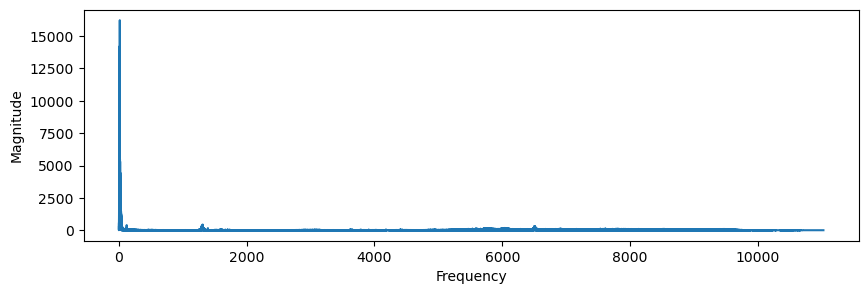

AttributeError: module 'matplotlib' has no attribute 'pyplot'

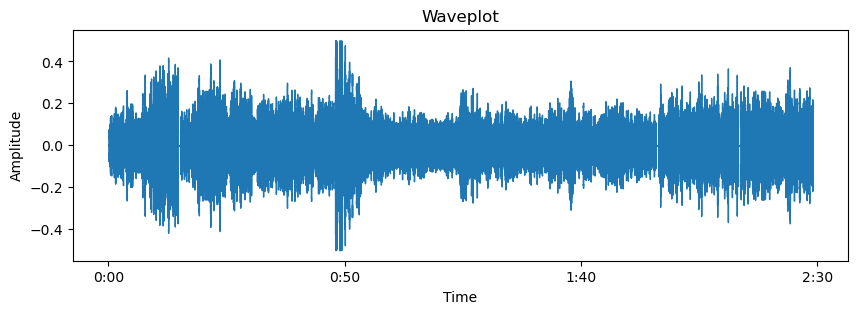

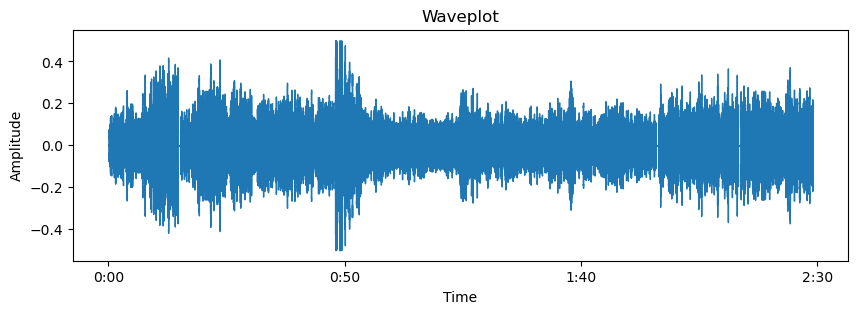

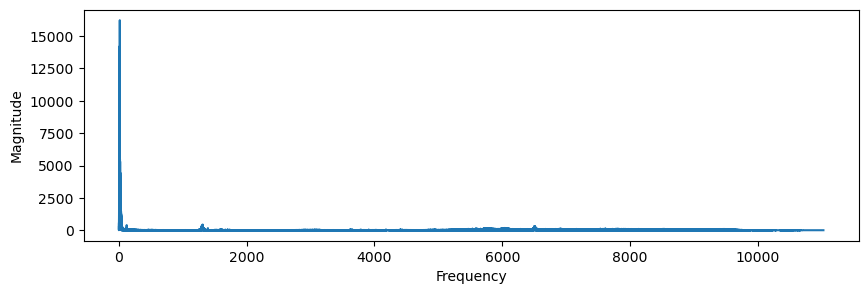

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [8]:
#Fourier Frequency Transform(FFT)

fft=np.fft.fft(signal)
magnitude=np.abs(fft)#for scaling
frequency=np.linspace(0, sr, len(magnitude))

lft_freq=frequency[:int(len(frequency)/2)]
lft_mag=magnitude[:int(len(frequency)/2)]

plt.figure(figsize=(10, 3))
plt.plot(lft_freq, lft_mag)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()

AttributeError: module 'matplotlib' has no attribute 'axes'

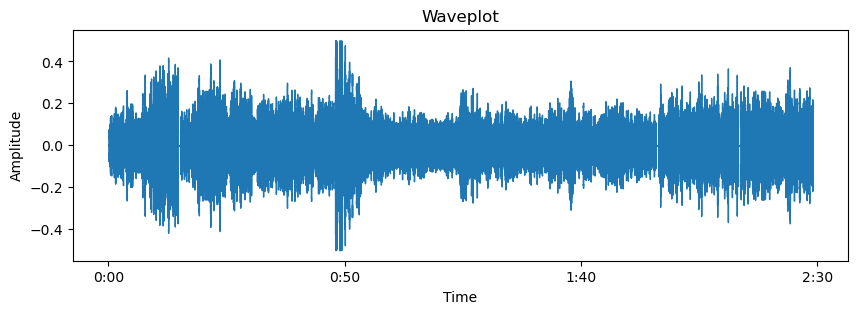

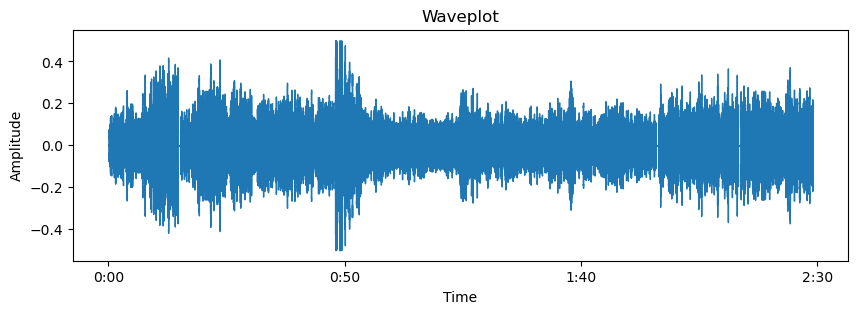

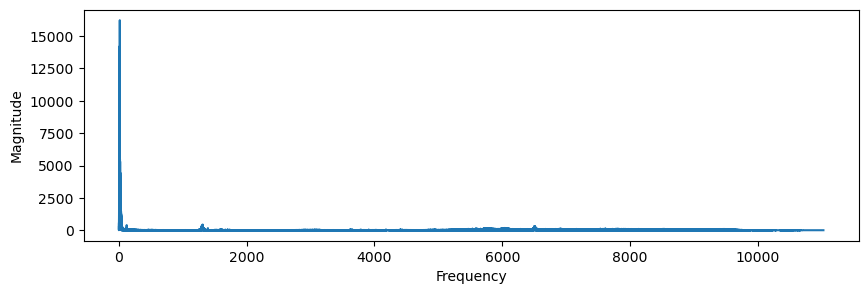

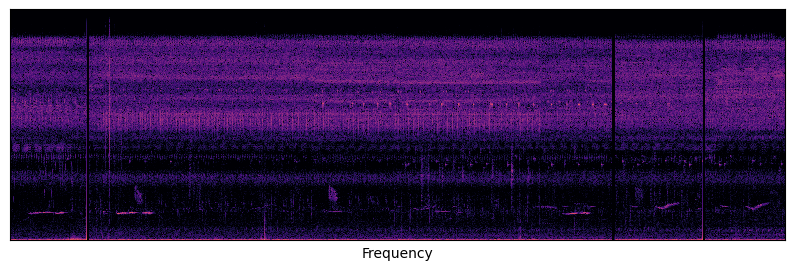

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [9]:
#stft
n_fft=2048
hop_length=512

stft=librosa.core.stft(signal, hop_length=hop_length, n_fft=n_fft)
spectrogram=np.abs(stft)

log_spectrogram = librosa.amplitude_to_db(spectrogram)#scaling

plt.figure(figsize=(10, 3))
librosa.display.specshow(log_spectrogram, sr=sr, hop_length=hop_length )
plt.xlabel("Time")
plt.xlabel("Frequency")
plt.colorbar()
plt.show()

In [10]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Load audio file and compute the MFCCs
audio_path = "/content/drive/MyDrive/All1/major/CRYVAR08.mp3"
y, sr = librosa.load(audio_path)
n_fft = 2048
hop_length = 512
MFCCs = librosa.feature.mfcc(y=y, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mfcc=13)

# Create a new figure and set the size
plt.figure(figsize=(10, 3))  # Adjust the size as per your preference

# Display the MFCCs
librosa.display.specshow(MFCCs, sr=sr, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC")
plt.colorbar()
plt.title("MFCCs")
plt.show()


/tmp/ipykernel_37734/298939921.py:7: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path)


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/All1/major/CRYVAR08.mp3'

# **`PreProcessing`**

In [11]:
import os
import math
import json
DATASET_PATH="/home/katende/RECESS/AudioBad/All1"
JSON_PATH="/home/katende/RECESS/AudioBad/data.json"

SAMPLE_RATE=22050
DURATION=15
SAMPLE_PER_TRACK=SAMPLE_RATE * DURATION

def save_mfcc(dataset_path,json_path,n_mfcc=13, n_fft=2048,hop_length=512,num_segments=5):
  #dictionary to store data
  data={
      "mapping":[],
      "mfcc":[],
      "labels":[]
  }

  num_samples_per_segment=int(SAMPLE_PER_TRACK/num_segments)
  expected_num_mfcc_vectors_per_segment = math.ceil(num_samples_per_segment/hop_length)


  for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):
    #such that we aint at the root level
    if dirpath is not dataset_path:

      #save the semantic label
      dirpath_components = dirpath.split("/") #species/taoi=>["species","taoi"]
      semantic_label = dirpath_components[-1]
      data["mapping"].append(semantic_label)
      print("\nProcessing {}".format(semantic_label))

      #processing files for a specific species
      for f in filenames:
        #load audio files
        file_path =os.path.join(dirpath,f)
        signal, sr = librosa.load(file_path, sr=SAMPLE_RATE)

        #process segments extracting mfcc and storing data

        for s in range(num_segments):
          start_sample = num_samples_per_segment * s
          finish_sample = start_sample + num_samples_per_segment


          mfcc = librosa.feature.mfcc(y=signal[start_sample:finish_sample],
                            sr=sr,
                            n_fft=n_fft,
                            n_mfcc=n_mfcc,
                            hop_length=hop_length)

          mfcc=mfcc.T

          #store mfcc for segment if it has expected length
          if len(mfcc)==expected_num_mfcc_vectors_per_segment:
            data["mfcc"].append(mfcc.tolist())
            data["labels"].append(i-1)
            print("{}, segment:{}".format(file_path, s))

  with open(json_path, "w") as fp:
    json.dump(data, fp, indent=4)


if __name__ == "__main__":
  save_mfcc(DATASET_PATH, JSON_PATH, num_segments=10)




Processing solitarius


/home/katende/RECESS/AudioBad/All1/solitarius/XC527911-Tinamus solitarius DCB 575-15d.mp3, segment:0
/home/katende/RECESS/AudioBad/All1/solitarius/XC527911-Tinamus solitarius DCB 575-15d.mp3, segment:1
/home/katende/RECESS/AudioBad/All1/solitarius/XC527911-Tinamus solitarius DCB 575-15d.mp3, segment:2
/home/katende/RECESS/AudioBad/All1/solitarius/XC527911-Tinamus solitarius DCB 575-15d.mp3, segment:3
/home/katende/RECESS/AudioBad/All1/solitarius/XC527911-Tinamus solitarius DCB 575-15d.mp3, segment:4
/home/katende/RECESS/AudioBad/All1/solitarius/XC527911-Tinamus solitarius DCB 575-15d.mp3, segment:5
/home/katende/RECESS/AudioBad/All1/solitarius/XC527911-Tinamus solitarius DCB 575-15d.mp3, segment:6
/home/katende/RECESS/AudioBad/All1/solitarius/XC527911-Tinamus solitarius DCB 575-15d.mp3, segment:7
/home/katende/RECESS/AudioBad/All1/solitarius/XC527911-Tinamus solitarius DCB 575-15d.mp3, segment:8


/home/katende/anaconda3/lib/python3.10/site-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=693
  warnings.warn(


/home/katende/RECESS/AudioBad/All1/solitarius/Solitary_Tinamu_Zizo-1-63.mp3, segment:0
/home/katende/RECESS/AudioBad/All1/solitarius/Solitary_Tinamu_Zizo-1-63.mp3, segment:1
/home/katende/RECESS/AudioBad/All1/solitarius/Solitary_Tinamu_Zizo-1-63.mp3, segment:2
/home/katende/RECESS/AudioBad/All1/solitarius/Solitary_Tinamu_Zizo-1-63.mp3, segment:3


/home/katende/anaconda3/lib/python3.10/site-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=0
  warnings.warn(


/home/katende/RECESS/AudioBad/All1/solitarius/XC326013-667. Tinamus solitarius (song)Veracel_PortoSeguroBA181012.mp3, segment:0
/home/katende/RECESS/AudioBad/All1/solitarius/XC326013-667. Tinamus solitarius (song)Veracel_PortoSeguroBA181012.mp3, segment:1
/home/katende/RECESS/AudioBad/All1/solitarius/XC326013-667. Tinamus solitarius (song)Veracel_PortoSeguroBA181012.mp3, segment:2
/home/katende/RECESS/AudioBad/All1/solitarius/XC326013-667. Tinamus solitarius (song)Veracel_PortoSeguroBA181012.mp3, segment:3
/home/katende/RECESS/AudioBad/All1/solitarius/XC326013-667. Tinamus solitarius (song)Veracel_PortoSeguroBA181012.mp3, segment:4
/home/katende/RECESS/AudioBad/All1/solitarius/XC326013-667. Tinamus solitarius (song)Veracel_PortoSeguroBA181012.mp3, segment:5
/home/katende/RECESS/AudioBad/All1/solitarius/XC326013-667. Tinamus solitarius (song)Veracel_PortoSeguroBA181012.mp3, segment:6
/home/katende/RECESS/AudioBad/All1/solitarius/XC326013-667. Tinamus solitarius (song)Veracel_PortoSeguro

/home/katende/anaconda3/lib/python3.10/site-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=22
  warnings.warn(


/home/katende/RECESS/AudioBad/All1/solitarius/XC231251-Solitary Tinamou C 17.mp3, segment:1
/home/katende/RECESS/AudioBad/All1/solitarius/XC231251-Solitary Tinamou C 17.mp3, segment:2
/home/katende/RECESS/AudioBad/All1/solitarius/XC113213-12090616'.mp3, segment:0
/home/katende/RECESS/AudioBad/All1/solitarius/XC113213-12090616'.mp3, segment:1
/home/katende/RECESS/AudioBad/All1/solitarius/XC113213-12090616'.mp3, segment:2
/home/katende/RECESS/AudioBad/All1/solitarius/XC113213-12090616'.mp3, segment:3
/home/katende/RECESS/AudioBad/All1/solitarius/XC113213-12090616'.mp3, segment:4
/home/katende/RECESS/AudioBad/All1/solitarius/XC113213-12090616'.mp3, segment:5
/home/katende/RECESS/AudioBad/All1/solitarius/XC113213-12090616'.mp3, segment:6
/home/katende/RECESS/AudioBad/All1/solitarius/XC113213-12090616'.mp3, segment:7
/home/katende/RECESS/AudioBad/All1/solitarius/XC113213-12090616'.mp3, segment:8
/home/katende/RECESS/AudioBad/All1/solitarius/XC113213-12090616'.mp3, segment:9
/home/katende/RE

/home/katende/anaconda3/lib/python3.10/site-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1164
  warnings.warn(


/home/katende/RECESS/AudioBad/All1/solitarius/XC144378-Tinamus-solitarius-PECantareira-SP-BR-16-10-99-ASilveira.mp3, segment:0
/home/katende/RECESS/AudioBad/All1/solitarius/XC144378-Tinamus-solitarius-PECantareira-SP-BR-16-10-99-ASilveira.mp3, segment:1
/home/katende/RECESS/AudioBad/All1/solitarius/XC144378-Tinamus-solitarius-PECantareira-SP-BR-16-10-99-ASilveira.mp3, segment:2
/home/katende/RECESS/AudioBad/All1/solitarius/XC144378-Tinamus-solitarius-PECantareira-SP-BR-16-10-99-ASilveira.mp3, segment:3
/home/katende/RECESS/AudioBad/All1/solitarius/XC144378-Tinamus-solitarius-PECantareira-SP-BR-16-10-99-ASilveira.mp3, segment:4
/home/katende/RECESS/AudioBad/All1/solitarius/XC144378-Tinamus-solitarius-PECantareira-SP-BR-16-10-99-ASilveira.mp3, segment:5
/home/katende/RECESS/AudioBad/All1/solitarius/XC144378-Tinamus-solitarius-PECantareira-SP-BR-16-10-99-ASilveira.mp3, segment:6
/home/katende/RECESS/AudioBad/All1/solitarius/XC144378-Tinamus-solitarius-PECantareira-SP-BR-16-10-99-ASilveira

Note: Illegal Audio-MPEG-Header 0x312c202d at offset 68671.
Note: Trying to resync...
Note: Hit end of (available) data during resync.


/home/katende/RECESS/AudioBad/All1/solitarius/XC187295-Tinamus solitarius APA.mp3, segment:0
/home/katende/RECESS/AudioBad/All1/solitarius/XC187295-Tinamus solitarius APA.mp3, segment:1
/home/katende/RECESS/AudioBad/All1/solitarius/XC187295-Tinamus solitarius APA.mp3, segment:2
/home/katende/RECESS/AudioBad/All1/solitarius/XC187295-Tinamus solitarius APA.mp3, segment:3
/home/katende/RECESS/AudioBad/All1/solitarius/XC187295-Tinamus solitarius APA.mp3, segment:4
/home/katende/RECESS/AudioBad/All1/solitarius/XC187295-Tinamus solitarius APA.mp3, segment:5
/home/katende/RECESS/AudioBad/All1/solitarius/XC198702-Tinamus.mp3, segment:0
/home/katende/RECESS/AudioBad/All1/solitarius/XC198702-Tinamus.mp3, segment:1
/home/katende/RECESS/AudioBad/All1/solitarius/XC198702-Tinamus.mp3, segment:2
/home/katende/RECESS/AudioBad/All1/solitarius/XC198702-Tinamus.mp3, segment:3
/home/katende/RECESS/AudioBad/All1/solitarius/XC198702-Tinamus.mp3, segment:4
/home/katende/RECESS/AudioBad/All1/solitarius/XC1734

/home/katende/RECESS/AudioBad/All1/solitarius/XC353537-Tinamus solitarius (Vieillot, 1819)6.mp3, segment:0
/home/katende/RECESS/AudioBad/All1/solitarius/XC353537-Tinamus solitarius (Vieillot, 1819)6.mp3, segment:1
/home/katende/RECESS/AudioBad/All1/solitarius/XC353537-Tinamus solitarius (Vieillot, 1819)6.mp3, segment:2
/home/katende/RECESS/AudioBad/All1/solitarius/XC353537-Tinamus solitarius (Vieillot, 1819)6.mp3, segment:3
/home/katende/RECESS/AudioBad/All1/solitarius/XC353537-Tinamus solitarius (Vieillot, 1819)6.mp3, segment:4
/home/katende/RECESS/AudioBad/All1/solitarius/XC353537-Tinamus solitarius (Vieillot, 1819)6.mp3, segment:5
/home/katende/RECESS/AudioBad/All1/solitarius/XC353537-Tinamus solitarius (Vieillot, 1819)6.mp3, segment:6
/home/katende/RECESS/AudioBad/All1/solitarius/XC353537-Tinamus solitarius (Vieillot, 1819)6.mp3, segment:7
/home/katende/RECESS/AudioBad/All1/solitarius/XC353537-Tinamus solitarius (Vieillot, 1819)6.mp3, segment:8
/home/katende/RECESS/AudioBad/All1/so

/home/katende/RECESS/AudioBad/All1/solitarius/XC397296-171112_1109 SOTI 150ft REd trail 1200 mp3 amp.mp3, segment:0
/home/katende/RECESS/AudioBad/All1/solitarius/XC397296-171112_1109 SOTI 150ft REd trail 1200 mp3 amp.mp3, segment:1
/home/katende/RECESS/AudioBad/All1/solitarius/XC397296-171112_1109 SOTI 150ft REd trail 1200 mp3 amp.mp3, segment:2
/home/katende/RECESS/AudioBad/All1/solitarius/XC397296-171112_1109 SOTI 150ft REd trail 1200 mp3 amp.mp3, segment:3
/home/katende/RECESS/AudioBad/All1/solitarius/XC278337-Tinamus noctivagus.mp3, segment:0
/home/katende/RECESS/AudioBad/All1/solitarius/XC278337-Tinamus noctivagus.mp3, segment:1
/home/katende/RECESS/AudioBad/All1/solitarius/XC278337-Tinamus noctivagus.mp3, segment:2
/home/katende/RECESS/AudioBad/All1/solitarius/XC278337-Tinamus noctivagus.mp3, segment:3
/home/katende/RECESS/AudioBad/All1/solitarius/XC278337-Tinamus noctivagus.mp3, segment:4
/home/katende/RECESS/AudioBad/All1/solitarius/XC278337-Tinamus noctivagus.mp3, segment:5
/h

/home/katende/RECESS/AudioBad/All1/solitarius/XC591392-Tin solitarius PEC cabuçu 17_09_2020_MMelo.mp3, segment:0
/home/katende/RECESS/AudioBad/All1/solitarius/XC591392-Tin solitarius PEC cabuçu 17_09_2020_MMelo.mp3, segment:1
/home/katende/RECESS/AudioBad/All1/solitarius/XC591392-Tin solitarius PEC cabuçu 17_09_2020_MMelo.mp3, segment:2
/home/katende/RECESS/AudioBad/All1/solitarius/XC591392-Tin solitarius PEC cabuçu 17_09_2020_MMelo.mp3, segment:3
/home/katende/RECESS/AudioBad/All1/solitarius/XC591392-Tin solitarius PEC cabuçu 17_09_2020_MMelo.mp3, segment:4
/home/katende/RECESS/AudioBad/All1/solitarius/XC591392-Tin solitarius PEC cabuçu 17_09_2020_MMelo.mp3, segment:5
/home/katende/RECESS/AudioBad/All1/solitarius/XC591392-Tin solitarius PEC cabuçu 17_09_2020_MMelo.mp3, segment:6
/home/katende/RECESS/AudioBad/All1/solitarius/XC591392-Tin solitarius PEC cabuçu 17_09_2020_MMelo.mp3, segment:7
/home/katende/RECESS/AudioBad/All1/solitarius/XC591392-Tin solitarius PEC cabuçu 17_09_2020_MMel

/home/katende/RECESS/AudioBad/All1/troglodytes/XC651066-tt.mp3, segment:1
/home/katende/RECESS/AudioBad/All1/troglodytes/XC811943-wren2.wav, segment:0
/home/katende/RECESS/AudioBad/All1/troglodytes/XC811943-wren2.wav, segment:1
/home/katende/RECESS/AudioBad/All1/troglodytes/XC811943-wren2.wav, segment:2
/home/katende/RECESS/AudioBad/All1/troglodytes/XC811943-wren2.wav, segment:3
/home/katende/RECESS/AudioBad/All1/troglodytes/XC811943-wren2.wav, segment:4
/home/katende/RECESS/AudioBad/All1/troglodytes/XC811943-wren2.wav, segment:5
/home/katende/RECESS/AudioBad/All1/troglodytes/XC811943-wren2.wav, segment:6
/home/katende/RECESS/AudioBad/All1/troglodytes/XC811943-wren2.wav, segment:7
/home/katende/RECESS/AudioBad/All1/troglodytes/XC811943-wren2.wav, segment:8
/home/katende/RECESS/AudioBad/All1/troglodytes/XC811943-wren2.wav, segment:9
/home/katende/RECESS/AudioBad/All1/troglodytes/XC685807-211024_0837_trotro.mp3, segment:0
/home/katende/RECESS/AudioBad/All1/troglodytes/XC685807-211024_083

/home/katende/anaconda3/lib/python3.10/site-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1838
  warnings.warn(


/home/katende/RECESS/AudioBad/All1/troglodytes/XC726344-troglodytes troglodytes2022.05.21_11.26_01 2.mp3, segment:0
/home/katende/RECESS/AudioBad/All1/troglodytes/XC726344-troglodytes troglodytes2022.05.21_11.26_01 2.mp3, segment:1
/home/katende/RECESS/AudioBad/All1/troglodytes/XC726344-troglodytes troglodytes2022.05.21_11.26_01 2.mp3, segment:2
/home/katende/RECESS/AudioBad/All1/troglodytes/XC726344-troglodytes troglodytes2022.05.21_11.26_01 2.mp3, segment:3
/home/katende/RECESS/AudioBad/All1/troglodytes/XC726344-troglodytes troglodytes2022.05.21_11.26_01 2.mp3, segment:4
/home/katende/RECESS/AudioBad/All1/troglodytes/XC707279-Troglodytemignon_07102021_carollesvauban_12h00 cris posé.mp3, segment:0
/home/katende/RECESS/AudioBad/All1/troglodytes/XC707279-Troglodytemignon_07102021_carollesvauban_12h00 cris posé.mp3, segment:1
/home/katende/RECESS/AudioBad/All1/troglodytes/XC707279-Troglodytemignon_07102021_carollesvauban_12h00 cris posé.mp3, segment:2
/home/katende/RECESS/AudioBad/All1/t

/home/katende/anaconda3/lib/python3.10/site-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1441
  warnings.warn(


/home/katende/RECESS/AudioBad/All1/troglodytes/XC808765-29.05.2023---18.50---T.-troglodytes.wav, segment:0
/home/katende/RECESS/AudioBad/All1/troglodytes/XC808765-29.05.2023---18.50---T.-troglodytes.wav, segment:1
/home/katende/RECESS/AudioBad/All1/troglodytes/XC808765-29.05.2023---18.50---T.-troglodytes.wav, segment:2
/home/katende/RECESS/AudioBad/All1/troglodytes/XC808765-29.05.2023---18.50---T.-troglodytes.wav, segment:3
/home/katende/RECESS/AudioBad/All1/troglodytes/XC808765-29.05.2023---18.50---T.-troglodytes.wav, segment:4
/home/katende/RECESS/AudioBad/All1/troglodytes/XC808765-29.05.2023---18.50---T.-troglodytes.wav, segment:5
/home/katende/RECESS/AudioBad/All1/troglodytes/XC808765-29.05.2023---18.50---T.-troglodytes.wav, segment:6
/home/katende/RECESS/AudioBad/All1/troglodytes/XC808765-29.05.2023---18.50---T.-troglodytes.wav, segment:7
/home/katende/RECESS/AudioBad/All1/troglodytes/XC808765-29.05.2023---18.50---T.-troglodytes.wav, segment:8
/home/katende/RECESS/AudioBad/All1/tr

/home/katende/anaconda3/lib/python3.10/site-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=30
  warnings.warn(


/home/katende/RECESS/AudioBad/All1/troglodytes/XC767553-Troglodytes-troglodytes_2022.12.09_16.43_01-11.mp3, segment:0
/home/katende/RECESS/AudioBad/All1/troglodytes/XC767553-Troglodytes-troglodytes_2022.12.09_16.43_01-11.mp3, segment:1
/home/katende/RECESS/AudioBad/All1/troglodytes/XC767553-Troglodytes-troglodytes_2022.12.09_16.43_01-11.mp3, segment:2
/home/katende/RECESS/AudioBad/All1/troglodytes/XC767553-Troglodytes-troglodytes_2022.12.09_16.43_01-11.mp3, segment:3
/home/katende/RECESS/AudioBad/All1/troglodytes/XC767553-Troglodytes-troglodytes_2022.12.09_16.43_01-11.mp3, segment:4
/home/katende/RECESS/AudioBad/All1/troglodytes/XC767553-Troglodytes-troglodytes_2022.12.09_16.43_01-11.mp3, segment:5
/home/katende/RECESS/AudioBad/All1/troglodytes/XC767553-Troglodytes-troglodytes_2022.12.09_16.43_01-11.mp3, segment:6
/home/katende/RECESS/AudioBad/All1/troglodytes/XC767553-Troglodytes-troglodytes_2022.12.09_16.43_01-11.mp3, segment:7
/home/katende/RECESS/AudioBad/All1/troglodytes/XC810835-

/home/katende/anaconda3/lib/python3.10/site-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1894
  warnings.warn(


/home/katende/RECESS/AudioBad/All1/troglodytes/XC788846-Tro.tro.1_Pendilhe.wav, segment:0
/home/katende/RECESS/AudioBad/All1/troglodytes/XC788846-Tro.tro.1_Pendilhe.wav, segment:1
/home/katende/RECESS/AudioBad/All1/troglodytes/XC788846-Tro.tro.1_Pendilhe.wav, segment:2
/home/katende/RECESS/AudioBad/All1/troglodytes/XC788846-Tro.tro.1_Pendilhe.wav, segment:3
/home/katende/RECESS/AudioBad/All1/troglodytes/XC788846-Tro.tro.1_Pendilhe.wav, segment:4
/home/katende/RECESS/AudioBad/All1/troglodytes/XC788846-Tro.tro.1_Pendilhe.wav, segment:5
/home/katende/RECESS/AudioBad/All1/troglodytes/XC749506-Robin_Song_LF87_Wexford_250822_A+++_11.mp3, segment:0
/home/katende/RECESS/AudioBad/All1/troglodytes/XC749506-Robin_Song_LF87_Wexford_250822_A+++_11.mp3, segment:1
/home/katende/RECESS/AudioBad/All1/troglodytes/XC749506-Robin_Song_LF87_Wexford_250822_A+++_11.mp3, segment:2
/home/katende/RECESS/AudioBad/All1/troglodytes/XC749506-Robin_Song_LF87_Wexford_250822_A+++_11.mp3, segment:3
/home/katende/RECESS

Note: Illegal Audio-MPEG-Header 0x6e69edca at offset 1028930.
Note: Trying to resync...
Note: Skipped 386 bytes in input.


/home/katende/RECESS/AudioBad/All1/troglodytes/XC700254-0944-Troglodyte mignon.mp3, segment:0
/home/katende/RECESS/AudioBad/All1/troglodytes/XC700254-0944-Troglodyte mignon.mp3, segment:1
/home/katende/RECESS/AudioBad/All1/troglodytes/XC700254-0944-Troglodyte mignon.mp3, segment:2
/home/katende/RECESS/AudioBad/All1/troglodytes/XC700254-0944-Troglodyte mignon.mp3, segment:3
/home/katende/RECESS/AudioBad/All1/troglodytes/XC700254-0944-Troglodyte mignon.mp3, segment:4
/home/katende/RECESS/AudioBad/All1/troglodytes/XC700254-0944-Troglodyte mignon.mp3, segment:5
/home/katende/RECESS/AudioBad/All1/troglodytes/XC700254-0944-Troglodyte mignon.mp3, segment:6
/home/katende/RECESS/AudioBad/All1/troglodytes/XC700254-0944-Troglodyte mignon.mp3, segment:7
/home/katende/RECESS/AudioBad/All1/troglodytes/XC700254-0944-Troglodyte mignon.mp3, segment:8
/home/katende/RECESS/AudioBad/All1/troglodytes/XC700254-0944-Troglodyte mignon.mp3, segment:9
/home/katende/RECESS/AudioBad/All1/troglodytes/XC770633-Trog

/home/katende/anaconda3/lib/python3.10/site-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1640
  warnings.warn(


/home/katende/RECESS/AudioBad/All1/troglodytes/XC791053-wren.wav, segment:0
/home/katende/RECESS/AudioBad/All1/troglodytes/XC791053-wren.wav, segment:1
/home/katende/RECESS/AudioBad/All1/troglodytes/XC791053-wren.wav, segment:2
/home/katende/RECESS/AudioBad/All1/troglodytes/XC791053-wren.wav, segment:3
/home/katende/RECESS/AudioBad/All1/troglodytes/XC791053-wren.wav, segment:4
/home/katende/RECESS/AudioBad/All1/troglodytes/XC791053-wren.wav, segment:5
/home/katende/RECESS/AudioBad/All1/troglodytes/XC791053-wren.wav, segment:6
/home/katende/RECESS/AudioBad/All1/troglodytes/XC791053-wren.wav, segment:7
/home/katende/RECESS/AudioBad/All1/troglodytes/XC791053-wren.wav, segment:8
/home/katende/RECESS/AudioBad/All1/troglodytes/XC791053-wren.wav, segment:9
/home/katende/RECESS/AudioBad/All1/troglodytes/XC790346-TROTRO_220327_1482_AireFenioux.mp3, segment:0
/home/katende/RECESS/AudioBad/All1/troglodytes/XC790346-TROTRO_220327_1482_AireFenioux.mp3, segment:1
/home/katende/RECESS/AudioBad/All1/t

/home/katende/anaconda3/lib/python3.10/site-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=794
  warnings.warn(


/home/katende/RECESS/AudioBad/All1/cinereus/XC403446-Inhambu pixuna finalizado.mp3, segment:2
/home/katende/RECESS/AudioBad/All1/cinereus/XC403446-Inhambu pixuna finalizado.mp3, segment:3
/home/katende/RECESS/AudioBad/All1/cinereus/XC403446-Inhambu pixuna finalizado.mp3, segment:4
/home/katende/RECESS/AudioBad/All1/cinereus/XC403446-Inhambu pixuna finalizado.mp3, segment:5
/home/katende/RECESS/AudioBad/All1/cinereus/XC403446-Inhambu pixuna finalizado.mp3, segment:6
/home/katende/RECESS/AudioBad/All1/cinereus/XC333322-CRYCIN13.mp3, segment:0
/home/katende/RECESS/AudioBad/All1/cinereus/XC333322-CRYCIN13.mp3, segment:1
/home/katende/RECESS/AudioBad/All1/cinereus/XC333322-CRYCIN13.mp3, segment:2
/home/katende/RECESS/AudioBad/All1/cinereus/XC333322-CRYCIN13.mp3, segment:3
/home/katende/RECESS/AudioBad/All1/cinereus/XC333322-CRYCIN13.mp3, segment:4
/home/katende/RECESS/AudioBad/All1/cinereus/XC333322-CRYCIN13.mp3, segment:5
/home/katende/RECESS/AudioBad/All1/cinereus/XC333322-CRYCIN13.mp3, s

/home/katende/RECESS/AudioBad/All1/cinereus/XC770944-AUDIO-2022-11-30-06-55-37(1).mp3, segment:0
/home/katende/RECESS/AudioBad/All1/cinereus/XC770944-AUDIO-2022-11-30-06-55-37(1).mp3, segment:1
/home/katende/RECESS/AudioBad/All1/cinereus/XC770944-AUDIO-2022-11-30-06-55-37(1).mp3, segment:2
/home/katende/RECESS/AudioBad/All1/cinereus/XC770944-AUDIO-2022-11-30-06-55-37(1).mp3, segment:3
/home/katende/RECESS/AudioBad/All1/cinereus/XC770944-AUDIO-2022-11-30-06-55-37(1).mp3, segment:4
/home/katende/RECESS/AudioBad/All1/cinereus/XC435858-180726_12_Cinereous Tinamou_Tabajara, RO, Brazil_25 July 2018.mp3, segment:0
/home/katende/RECESS/AudioBad/All1/cinereus/XC435858-180726_12_Cinereous Tinamou_Tabajara, RO, Brazil_25 July 2018.mp3, segment:1
/home/katende/RECESS/AudioBad/All1/cinereus/XC435858-180726_12_Cinereous Tinamou_Tabajara, RO, Brazil_25 July 2018.mp3, segment:2
/home/katende/RECESS/AudioBad/All1/cinereus/XC435858-180726_12_Cinereous Tinamou_Tabajara, RO, Brazil_25 July 2018.mp3, segme

Note: Illegal Audio-MPEG-Header 0x6e616d75 at offset 224779.
Note: Trying to resync...
Note: Hit end of (available) data during resync.


/home/katende/RECESS/AudioBad/All1/major/XC256978-150629_06_Tmajor.mp3, segment:2
/home/katende/RECESS/AudioBad/All1/major/XC256978-150629_06_Tmajor.mp3, segment:3
/home/katende/RECESS/AudioBad/All1/major/XC256978-150629_06_Tmajor.mp3, segment:4
/home/katende/RECESS/AudioBad/All1/major/XC256978-150629_06_Tmajor.mp3, segment:5
/home/katende/RECESS/AudioBad/All1/major/XC256978-150629_06_Tmajor.mp3, segment:6
/home/katende/RECESS/AudioBad/All1/major/XC256978-150629_06_Tmajor.mp3, segment:7
/home/katende/RECESS/AudioBad/All1/major/XC256978-150629_06_Tmajor.mp3, segment:8
/home/katende/RECESS/AudioBad/All1/major/XC490752-Tinamus major DCB 606-4b.mp3, segment:0
/home/katende/RECESS/AudioBad/All1/major/XC490752-Tinamus major DCB 606-4b.mp3, segment:1
/home/katende/RECESS/AudioBad/All1/major/XC490752-Tinamus major DCB 606-4b.mp3, segment:2
/home/katende/RECESS/AudioBad/All1/major/XC490752-Tinamus major DCB 606-4b.mp3, segment:3
/home/katende/RECESS/AudioBad/All1/major/XC490752-Tinamus major DC

/home/katende/anaconda3/lib/python3.10/site-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=406
  warnings.warn(


/home/katende/RECESS/AudioBad/All1/americana/XC229053-Greater Rhea B 3.mp3, segment:0
/home/katende/RECESS/AudioBad/All1/americana/XC229053-Greater Rhea B 3.mp3, segment:1
/home/katende/RECESS/AudioBad/All1/americana/XC229053-Greater Rhea B 3.mp3, segment:2
/home/katende/RECESS/AudioBad/All1/americana/XC229053-Greater Rhea B 3.mp3, segment:3
/home/katende/RECESS/AudioBad/All1/americana/XC229053-Greater Rhea B 3.mp3, segment:4
/home/katende/RECESS/AudioBad/All1/americana/XC229053-Greater Rhea B 3.mp3, segment:5
/home/katende/RECESS/AudioBad/All1/americana/XC229053-Greater Rhea B 3.mp3, segment:6
/home/katende/RECESS/AudioBad/All1/americana/XC229053-Greater Rhea B 3.mp3, segment:7
/home/katende/RECESS/AudioBad/All1/americana/XC229053-Greater Rhea B 3.mp3, segment:8
/home/katende/RECESS/AudioBad/All1/americana/XC229053-Greater Rhea B 3.mp3, segment:9

Processing undulatus
/home/katende/RECESS/AudioBad/All1/undulatus/XC754408-17-09-2022-18e21-Jao.mp3, segment:0
/home/katende/RECESS/AudioBa

Note: Illegal Audio-MPEG-Header 0xc2a36f20 at offset 869272.
Note: Trying to resync...
Note: Hit end of (available) data during resync.


/home/katende/RECESS/AudioBad/All1/soui/XC412497-Tururim2 02-03-2018 7hs (Crypturellus soui).mp3, segment:0
/home/katende/RECESS/AudioBad/All1/soui/XC412497-Tururim2 02-03-2018 7hs (Crypturellus soui).mp3, segment:1
/home/katende/RECESS/AudioBad/All1/soui/XC412497-Tururim2 02-03-2018 7hs (Crypturellus soui).mp3, segment:2
/home/katende/RECESS/AudioBad/All1/soui/XC412497-Tururim2 02-03-2018 7hs (Crypturellus soui).mp3, segment:3
/home/katende/RECESS/AudioBad/All1/soui/XC412497-Tururim2 02-03-2018 7hs (Crypturellus soui).mp3, segment:4
/home/katende/RECESS/AudioBad/All1/soui/XC412497-Tururim2 02-03-2018 7hs (Crypturellus soui).mp3, segment:5
/home/katende/RECESS/AudioBad/All1/soui/XC412497-Tururim2 02-03-2018 7hs (Crypturellus soui).mp3, segment:6
/home/katende/RECESS/AudioBad/All1/soui/XC412497-Tururim2 02-03-2018 7hs (Crypturellus soui).mp3, segment:7
/home/katende/RECESS/AudioBad/All1/soui/XC412497-Tururim2 02-03-2018 7hs (Crypturellus soui).mp3, segment:8
/home/katende/RECESS/AudioBa

/home/katende/anaconda3/lib/python3.10/site-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=117
  warnings.warn(


/home/katende/RECESS/AudioBad/All1/soui/XC127107-tururim ARACRUZ-ES.mp3, segment:0
/home/katende/RECESS/AudioBad/All1/soui/XC127107-tururim ARACRUZ-ES.mp3, segment:1
/home/katende/RECESS/AudioBad/All1/soui/XC127107-tururim ARACRUZ-ES.mp3, segment:2
/home/katende/RECESS/AudioBad/All1/soui/XC127107-tururim ARACRUZ-ES.mp3, segment:3
/home/katende/RECESS/AudioBad/All1/soui/XC127107-tururim ARACRUZ-ES.mp3, segment:4
/home/katende/RECESS/AudioBad/All1/soui/XC127107-tururim ARACRUZ-ES.mp3, segment:5
/home/katende/RECESS/AudioBad/All1/soui/litinamou.mp3, segment:0
/home/katende/RECESS/AudioBad/All1/soui/litinamou.mp3, segment:1
/home/katende/RECESS/AudioBad/All1/soui/litinamou.mp3, segment:2
/home/katende/RECESS/AudioBad/All1/soui/litinamou.mp3, segment:3
/home/katende/RECESS/AudioBad/All1/soui/litinamou.mp3, segment:4
/home/katende/RECESS/AudioBad/All1/soui/litinamou.mp3, segment:5
/home/katende/RECESS/AudioBad/All1/soui/litinamou.mp3, segment:6
/home/katende/RECESS/AudioBad/All1/soui/litinam

Note: Illegal Audio-MPEG-Header 0x32363729 at offset 180893.
Note: Trying to resync...
Note: Hit end of (available) data during resync.


/home/katende/RECESS/AudioBad/All1/soui/XC322436-audLittle Tinamou_Xixa_20160326_092239 (online-audio-converter.com).mp3, segment:0
/home/katende/RECESS/AudioBad/All1/soui/XC322436-audLittle Tinamou_Xixa_20160326_092239 (online-audio-converter.com).mp3, segment:1
/home/katende/RECESS/AudioBad/All1/soui/XC322436-audLittle Tinamou_Xixa_20160326_092239 (online-audio-converter.com).mp3, segment:2
/home/katende/RECESS/AudioBad/All1/soui/XC322436-audLittle Tinamou_Xixa_20160326_092239 (online-audio-converter.com).mp3, segment:3
/home/katende/RECESS/AudioBad/All1/soui/XC120036-Crypturellus soui_1055b.MP3, segment:0
/home/katende/RECESS/AudioBad/All1/soui/XC120036-Crypturellus soui_1055b.MP3, segment:1
/home/katende/RECESS/AudioBad/All1/soui/XC120036-Crypturellus soui_1055b.MP3, segment:2
/home/katende/RECESS/AudioBad/All1/soui/XC120036-Crypturellus soui_1055b.MP3, segment:3
/home/katende/RECESS/AudioBad/All1/soui/XC120036-Crypturellus soui_1055b.MP3, segment:4
/home/katende/RECESS/AudioBad/Al

Note: Illegal Audio-MPEG-Header 0x6c6f2064 at offset 559564.
Note: Trying to resync...
Note: Hit end of (available) data during resync.


/home/katende/RECESS/AudioBad/All1/soui/XC413837-Tururim3 (Crypturellus soui-OK).mp3, segment:0
/home/katende/RECESS/AudioBad/All1/soui/XC413837-Tururim3 (Crypturellus soui-OK).mp3, segment:1
/home/katende/RECESS/AudioBad/All1/soui/XC413837-Tururim3 (Crypturellus soui-OK).mp3, segment:2
/home/katende/RECESS/AudioBad/All1/soui/XC413837-Tururim3 (Crypturellus soui-OK).mp3, segment:3
/home/katende/RECESS/AudioBad/All1/soui/XC413837-Tururim3 (Crypturellus soui-OK).mp3, segment:4
/home/katende/RECESS/AudioBad/All1/soui/XC413837-Tururim3 (Crypturellus soui-OK).mp3, segment:5
/home/katende/RECESS/AudioBad/All1/soui/XC413837-Tururim3 (Crypturellus soui-OK).mp3, segment:6
/home/katende/RECESS/AudioBad/All1/soui/XC413837-Tururim3 (Crypturellus soui-OK).mp3, segment:7
/home/katende/RECESS/AudioBad/All1/soui/XC413837-Tururim3 (Crypturellus soui-OK).mp3, segment:8
/home/katende/RECESS/AudioBad/All1/soui/XC413837-Tururim3 (Crypturellus soui-OK).mp3, segment:9
/home/katende/RECESS/AudioBad/All1/soui/

Note: Illegal Audio-MPEG-Header 0x20646520 at offset 2157004.
Note: Trying to resync...
Note: Hit end of (available) data during resync.


/home/katende/RECESS/AudioBad/All1/soui/XC412494-Tururim (Crypturellus soui-OK-OK).mp3, segment:0
/home/katende/RECESS/AudioBad/All1/soui/XC412494-Tururim (Crypturellus soui-OK-OK).mp3, segment:1
/home/katende/RECESS/AudioBad/All1/soui/XC412494-Tururim (Crypturellus soui-OK-OK).mp3, segment:2
/home/katende/RECESS/AudioBad/All1/soui/XC412494-Tururim (Crypturellus soui-OK-OK).mp3, segment:3
/home/katende/RECESS/AudioBad/All1/soui/XC412494-Tururim (Crypturellus soui-OK-OK).mp3, segment:4
/home/katende/RECESS/AudioBad/All1/soui/XC412494-Tururim (Crypturellus soui-OK-OK).mp3, segment:5
/home/katende/RECESS/AudioBad/All1/soui/XC412494-Tururim (Crypturellus soui-OK-OK).mp3, segment:6
/home/katende/RECESS/AudioBad/All1/soui/XC412494-Tururim (Crypturellus soui-OK-OK).mp3, segment:7
/home/katende/RECESS/AudioBad/All1/soui/XC412494-Tururim (Crypturellus soui-OK-OK).mp3, segment:8
/home/katende/RECESS/AudioBad/All1/soui/XC412494-Tururim (Crypturellus soui-OK-OK).mp3, segment:9
/home/katende/RECESS

Note: Illegal Audio-MPEG-Header 0x75732073 at offset 191342.
Note: Trying to resync...
Note: Hit end of (available) data during resync.


/home/katende/RECESS/AudioBad/All1/soui/XC403196-701_0102 finalizado.mp3, segment:2
/home/katende/RECESS/AudioBad/All1/soui/XC403196-701_0102 finalizado.mp3, segment:3
/home/katende/RECESS/AudioBad/All1/soui/XC403196-701_0102 finalizado.mp3, segment:4
/home/katende/RECESS/AudioBad/All1/soui/XC403196-701_0102 finalizado.mp3, segment:5
/home/katende/RECESS/AudioBad/All1/soui/XC403196-701_0102 finalizado.mp3, segment:6
/home/katende/RECESS/AudioBad/All1/soui/XC490102-Crypturellus soui DCB 608-11.mp3, segment:0
/home/katende/RECESS/AudioBad/All1/soui/XC490102-Crypturellus soui DCB 608-11.mp3, segment:1
/home/katende/RECESS/AudioBad/All1/soui/XC490102-Crypturellus soui DCB 608-11.mp3, segment:2
/home/katende/RECESS/AudioBad/All1/soui/XC490102-Crypturellus soui DCB 608-11.mp3, segment:3
/home/katende/RECESS/AudioBad/All1/soui/XC490102-Crypturellus soui DCB 608-11.mp3, segment:4
/home/katende/RECESS/AudioBad/All1/soui/XC490102-Crypturellus soui DCB 608-11.mp3, segment:5
/home/katende/RECESS/A

Note: Illegal Audio-MPEG-Header 0x636e6961 at offset 677011.
Note: Trying to resync...
Note: Hit end of (available) data during resync.


/home/katende/RECESS/AudioBad/All1/averano/XC334312-160911_Procnias_Pirelli.mp3, segment:0
/home/katende/RECESS/AudioBad/All1/averano/XC334312-160911_Procnias_Pirelli.mp3, segment:1
/home/katende/RECESS/AudioBad/All1/averano/XC334312-160911_Procnias_Pirelli.mp3, segment:2
/home/katende/RECESS/AudioBad/All1/averano/XC334312-160911_Procnias_Pirelli.mp3, segment:3
/home/katende/RECESS/AudioBad/All1/averano/XC334312-160911_Procnias_Pirelli.mp3, segment:4
/home/katende/RECESS/AudioBad/All1/averano/XC334312-160911_Procnias_Pirelli.mp3, segment:5
/home/katende/RECESS/AudioBad/All1/averano/XC334312-160911_Procnias_Pirelli.mp3, segment:6
/home/katende/RECESS/AudioBad/All1/averano/XC334312-160911_Procnias_Pirelli.mp3, segment:7
/home/katende/RECESS/AudioBad/All1/averano/XC334312-160911_Procnias_Pirelli.mp3, segment:8
/home/katende/RECESS/AudioBad/All1/averano/XC334312-160911_Procnias_Pirelli.mp3, segment:9
/home/katende/RECESS/AudioBad/All1/averano/XC742170-220314_002_Procnias_averano.mp3, segme

/home/katende/RECESS/AudioBad/All1/tao/XC497975-Tinamus tao DCB 622-3Ac.mp3, segment:0
/home/katende/RECESS/AudioBad/All1/tao/XC497975-Tinamus tao DCB 622-3Ac.mp3, segment:1
/home/katende/RECESS/AudioBad/All1/tao/XC497975-Tinamus tao DCB 622-3Ac.mp3, segment:2
/home/katende/RECESS/AudioBad/All1/tao/XC217695-CRYSOU29.mp3, segment:0
/home/katende/RECESS/AudioBad/All1/tao/XC217695-CRYSOU29.mp3, segment:1
/home/katende/RECESS/AudioBad/All1/tao/XC217695-CRYSOU29.mp3, segment:2
/home/katende/RECESS/AudioBad/All1/tao/XC217695-CRYSOU29.mp3, segment:3
/home/katende/RECESS/AudioBad/All1/tao/XC217695-CRYSOU29.mp3, segment:4
/home/katende/RECESS/AudioBad/All1/tao/XC217695-CRYSOU29.mp3, segment:5
/home/katende/RECESS/AudioBad/All1/tao/XC217695-CRYSOU29.mp3, segment:6
/home/katende/RECESS/AudioBad/All1/tao/XC217695-CRYSOU29.mp3, segment:7
/home/katende/RECESS/AudioBad/All1/tao/XC217695-CRYSOU29.mp3, segment:8
/home/katende/RECESS/AudioBad/All1/tao/XC217695-CRYSOU29.mp3, segment:9
/home/katende/RECES

/home/katende/anaconda3/lib/python3.10/site-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1332
  warnings.warn(


/home/katende/RECESS/AudioBad/All1/tao/XC557622-Tinamus tao DCB 625-18a.mp3, segment:0
/home/katende/RECESS/AudioBad/All1/tao/XC557622-Tinamus tao DCB 625-18a.mp3, segment:1
/home/katende/RECESS/AudioBad/All1/tao/XC557622-Tinamus tao DCB 625-18a.mp3, segment:2
/home/katende/RECESS/AudioBad/All1/tao/XC557622-Tinamus tao DCB 625-18a.mp3, segment:3
/home/katende/RECESS/AudioBad/All1/tao/XC557622-Tinamus tao DCB 625-18a.mp3, segment:4
/home/katende/RECESS/AudioBad/All1/tao/XC557622-Tinamus tao DCB 625-18a.mp3, segment:5
/home/katende/RECESS/AudioBad/All1/tao/XC557622-Tinamus tao DCB 625-18a.mp3, segment:6
/home/katende/RECESS/AudioBad/All1/tao/XC557622-Tinamus tao DCB 625-18a.mp3, segment:7
/home/katende/RECESS/AudioBad/All1/tao/XC557622-Tinamus tao DCB 625-18a.mp3, segment:8
/home/katende/RECESS/AudioBad/All1/tao/XC557622-Tinamus tao DCB 625-18a.mp3, segment:9
/home/katende/RECESS/AudioBad/All1/tao/XC557618-Tinamus tao DCB 625-16d.mp3, segment:0
/home/katende/RECESS/AudioBad/All1/tao/XC55

/home/katende/anaconda3/lib/python3.10/site-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1128
  warnings.warn(
Note: Illegal Audio-MPEG-Header 0x00004745 at offset 702924.
Note: Trying to resync...
Note: Hit end of (available) data during resync.


/home/katende/RECESS/AudioBad/All1/tao/XC345458-Ttao.WAV (online-audio-converter.com).mp3, segment:0
/home/katende/RECESS/AudioBad/All1/tao/XC345458-Ttao.WAV (online-audio-converter.com).mp3, segment:1
/home/katende/RECESS/AudioBad/All1/tao/XC345458-Ttao.WAV (online-audio-converter.com).mp3, segment:2
/home/katende/RECESS/AudioBad/All1/tao/XC345458-Ttao.WAV (online-audio-converter.com).mp3, segment:3
/home/katende/RECESS/AudioBad/All1/tao/XC345458-Ttao.WAV (online-audio-converter.com).mp3, segment:4
/home/katende/RECESS/AudioBad/All1/tao/XC345458-Ttao.WAV (online-audio-converter.com).mp3, segment:5
/home/katende/RECESS/AudioBad/All1/tao/XC345458-Ttao.WAV (online-audio-converter.com).mp3, segment:6
/home/katende/RECESS/AudioBad/All1/tao/XC345458-Ttao.WAV (online-audio-converter.com).mp3, segment:7
/home/katende/RECESS/AudioBad/All1/tao/XC345458-Ttao.WAV (online-audio-converter.com).mp3, segment:8
/home/katende/RECESS/AudioBad/All1/tao/XC345458-Ttao.WAV (online-audio-converter.com).mp3, 

/home/katende/anaconda3/lib/python3.10/site-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1588
  warnings.warn(


/home/katende/RECESS/AudioBad/All1/tao/XC395760-Tinamus tao_Gurupi_1092.mp3, segment:0
/home/katende/RECESS/AudioBad/All1/tao/XC395760-Tinamus tao_Gurupi_1092.mp3, segment:1
/home/katende/RECESS/AudioBad/All1/tao/XC395760-Tinamus tao_Gurupi_1092.mp3, segment:2
/home/katende/RECESS/AudioBad/All1/tao/XC395760-Tinamus tao_Gurupi_1092.mp3, segment:3
/home/katende/RECESS/AudioBad/All1/tao/XC395760-Tinamus tao_Gurupi_1092.mp3, segment:4
/home/katende/RECESS/AudioBad/All1/tao/XC597722-Tinamos tao_Carajas_1030.WAV_E.mp3, segment:0
/home/katende/RECESS/AudioBad/All1/tao/XC597722-Tinamos tao_Carajas_1030.WAV_E.mp3, segment:1
/home/katende/RECESS/AudioBad/All1/tao/XC597722-Tinamos tao_Carajas_1030.WAV_E.mp3, segment:2
/home/katende/RECESS/AudioBad/All1/tao/XC597722-Tinamos tao_Carajas_1030.WAV_E.mp3, segment:3
/home/katende/RECESS/AudioBad/All1/tao/XC597722-Tinamos tao_Carajas_1030.WAV_E.mp3, segment:4
/home/katende/RECESS/AudioBad/All1/tao/XC597722-Tinamos tao_Carajas_1030.WAV_E.mp3, segment:5
/

/home/katende/anaconda3/lib/python3.10/site-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=237
  warnings.warn(


/home/katende/RECESS/AudioBad/All1/obsoletus/Crypturellus obsoletus_Faz. Santa Rita_PNSI_Indaial_SC_22-10-2009.mp3, segment:0
/home/katende/RECESS/AudioBad/All1/obsoletus/Crypturellus obsoletus_Faz. Santa Rita_PNSI_Indaial_SC_22-10-2009.mp3, segment:1
/home/katende/RECESS/AudioBad/All1/obsoletus/Crypturellus obsoletus_Faz. Santa Rita_PNSI_Indaial_SC_22-10-2009.mp3, segment:2
/home/katende/RECESS/AudioBad/All1/obsoletus/Crypturellus obsoletus_Faz. Santa Rita_PNSI_Indaial_SC_22-10-2009.mp3, segment:3
/home/katende/RECESS/AudioBad/All1/obsoletus/Crypturellus obsoletus_Faz. Santa Rita_PNSI_Indaial_SC_22-10-2009.mp3, segment:4
/home/katende/RECESS/AudioBad/All1/obsoletus/Crypturellus obsoletus_Faz. Santa Rita_PNSI_Indaial_SC_22-10-2009.mp3, segment:5
/home/katende/RECESS/AudioBad/All1/obsoletus/Crypturellus obsoletus_Faz. Santa Rita_PNSI_Indaial_SC_22-10-2009.mp3, segment:6
/home/katende/RECESS/AudioBad/All1/obsoletus/Crypturellus obsoletus_Faz. Santa Rita_PNSI_Indaial_SC_22-10-2009.mp3, se

Note: Illegal Audio-MPEG-Header 0x6c202f2f at offset 1532573.
Note: Trying to resync...
Note: Hit end of (available) data during resync.


/home/katende/RECESS/AudioBad/All1/obsoletus/XC329382-Brown TinamouAU_SB_20150727_071743 (online-audio-converter.com).mp3, segment:0
/home/katende/RECESS/AudioBad/All1/obsoletus/XC329382-Brown TinamouAU_SB_20150727_071743 (online-audio-converter.com).mp3, segment:1
/home/katende/RECESS/AudioBad/All1/obsoletus/XC329382-Brown TinamouAU_SB_20150727_071743 (online-audio-converter.com).mp3, segment:2
/home/katende/RECESS/AudioBad/All1/obsoletus/XC329382-Brown TinamouAU_SB_20150727_071743 (online-audio-converter.com).mp3, segment:3
/home/katende/RECESS/AudioBad/All1/obsoletus/XC329382-Brown TinamouAU_SB_20150727_071743 (online-audio-converter.com).mp3, segment:4
/home/katende/RECESS/AudioBad/All1/obsoletus/XC329382-Brown TinamouAU_SB_20150727_071743 (online-audio-converter.com).mp3, segment:5
/home/katende/RECESS/AudioBad/All1/obsoletus/XC329382-Brown TinamouAU_SB_20150727_071743 (online-audio-converter.com).mp3, segment:6
/home/katende/RECESS/AudioBad/All1/obsoletus/XC329382-Brown TinamouAU

Note: Illegal Audio-MPEG-Header 0x6f732c20 at offset 831656.
Note: Trying to resync...
Note: Hit end of (available) data during resync.


/home/katende/RECESS/AudioBad/All1/obsoletus/XC411806-Inhambuguacu 12-4-18 17e56.mp3, segment:0
/home/katende/RECESS/AudioBad/All1/obsoletus/XC411806-Inhambuguacu 12-4-18 17e56.mp3, segment:1
/home/katende/RECESS/AudioBad/All1/obsoletus/XC411806-Inhambuguacu 12-4-18 17e56.mp3, segment:2
/home/katende/RECESS/AudioBad/All1/obsoletus/XC411806-Inhambuguacu 12-4-18 17e56.mp3, segment:3
/home/katende/RECESS/AudioBad/All1/obsoletus/XC411806-Inhambuguacu 12-4-18 17e56.mp3, segment:4
/home/katende/RECESS/AudioBad/All1/obsoletus/XC411806-Inhambuguacu 12-4-18 17e56.mp3, segment:5
/home/katende/RECESS/AudioBad/All1/obsoletus/XC411806-Inhambuguacu 12-4-18 17e56.mp3, segment:6
/home/katende/RECESS/AudioBad/All1/obsoletus/XC411806-Inhambuguacu 12-4-18 17e56.mp3, segment:7
/home/katende/RECESS/AudioBad/All1/obsoletus/XC411806-Inhambuguacu 12-4-18 17e56.mp3, segment:8
/home/katende/RECESS/AudioBad/All1/obsoletus/XC411806-Inhambuguacu 12-4-18 17e56.mp3, segment:9
/home/katende/RECESS/AudioBad/All1/obsol

/home/katende/anaconda3/lib/python3.10/site-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=96
  warnings.warn(


/home/katende/RECESS/AudioBad/All1/obsoletus/XC221858-Brown Tinamou A 135.mp3, segment:0
/home/katende/RECESS/AudioBad/All1/obsoletus/XC221858-Brown Tinamou A 135.mp3, segment:1
/home/katende/RECESS/AudioBad/All1/obsoletus/XC221858-Brown Tinamou A 135.mp3, segment:2
/home/katende/RECESS/AudioBad/All1/obsoletus/XC221858-Brown Tinamou A 135.mp3, segment:3
/home/katende/RECESS/AudioBad/All1/obsoletus/XC221858-Brown Tinamou A 135.mp3, segment:4
/home/katende/RECESS/AudioBad/All1/obsoletus/XC221858-Brown Tinamou A 135.mp3, segment:5
/home/katende/RECESS/AudioBad/All1/obsoletus/XC221858-Brown Tinamou A 135.mp3, segment:6
/home/katende/RECESS/AudioBad/All1/obsoletus/XC221858-Brown Tinamou A 135.mp3, segment:7
/home/katende/RECESS/AudioBad/All1/obsoletus/XC221858-Brown Tinamou A 135.mp3, segment:8
/home/katende/RECESS/AudioBad/All1/obsoletus/XC221858-Brown Tinamou A 135.mp3, segment:9
/home/katende/RECESS/AudioBad/All1/obsoletus/XC165001-111115_0310.mp3inhambuguaçu2.mp3, segment:0
/home/katend

Note: Illegal Audio-MPEG-Header 0x292c2042 at offset 92495.
Note: Trying to resync...
Note: Hit end of (available) data during resync.


/home/katende/RECESS/AudioBad/All1/obsoletus/XC113744-inhambuguaçu4.mp3, segment:0
/home/katende/RECESS/AudioBad/All1/obsoletus/XC113744-inhambuguaçu4.mp3, segment:1
/home/katende/RECESS/AudioBad/All1/obsoletus/XC113744-inhambuguaçu4.mp3, segment:2
/home/katende/RECESS/AudioBad/All1/obsoletus/XC113744-inhambuguaçu4.mp3, segment:3
/home/katende/RECESS/AudioBad/All1/obsoletus/XC113744-inhambuguaçu4.mp3, segment:4
/home/katende/RECESS/AudioBad/All1/obsoletus/XC113744-inhambuguaçu4.mp3, segment:5
/home/katende/RECESS/AudioBad/All1/obsoletus/XC113744-inhambuguaçu4.mp3, segment:6
/home/katende/RECESS/AudioBad/All1/obsoletus/XC113744-inhambuguaçu4.mp3, segment:7
/home/katende/RECESS/AudioBad/All1/obsoletus/XC113744-inhambuguaçu4.mp3, segment:8
/home/katende/RECESS/AudioBad/All1/obsoletus/XC113744-inhambuguaçu4.mp3, segment:9
/home/katende/RECESS/AudioBad/All1/obsoletus/XC344613-Crypturellus obsoletus.MP3, segment:0
/home/katende/RECESS/AudioBad/All1/obsoletus/XC344613-Crypturellus obsoletus.M

Note: Illegal Audio-MPEG-Header 0x4c595249 at offset 844776.
Note: Trying to resync...
Note: Hit end of (available) data during resync.


/home/katende/RECESS/AudioBad/All1/obsoletus/XC389227-140914_16_Cryp_obsoletus_Set14_16e50.mp3, segment:0
/home/katende/RECESS/AudioBad/All1/obsoletus/XC389227-140914_16_Cryp_obsoletus_Set14_16e50.mp3, segment:1
/home/katende/RECESS/AudioBad/All1/obsoletus/XC389227-140914_16_Cryp_obsoletus_Set14_16e50.mp3, segment:2
/home/katende/RECESS/AudioBad/All1/obsoletus/XC389227-140914_16_Cryp_obsoletus_Set14_16e50.mp3, segment:3
/home/katende/RECESS/AudioBad/All1/obsoletus/XC389227-140914_16_Cryp_obsoletus_Set14_16e50.mp3, segment:4
/home/katende/RECESS/AudioBad/All1/obsoletus/XC389227-140914_16_Cryp_obsoletus_Set14_16e50.mp3, segment:5
/home/katende/RECESS/AudioBad/All1/obsoletus/XC389227-140914_16_Cryp_obsoletus_Set14_16e50.mp3, segment:6
/home/katende/RECESS/AudioBad/All1/obsoletus/XC389227-140914_16_Cryp_obsoletus_Set14_16e50.mp3, segment:7
/home/katende/RECESS/AudioBad/All1/obsoletus/XC389227-140914_16_Cryp_obsoletus_Set14_16e50.mp3, segment:8
/home/katende/RECESS/AudioBad/All1/obsoletus/X

Note: Illegal Audio-MPEG-Header 0xc383c2a7 at offset 83718.
Note: Trying to resync...
Note: Hit end of (available) data during resync.


/home/katende/RECESS/AudioBad/All1/obsoletus/XC414933-Inhambu chinta XENO (Crypturellus tataupa)22-09-17 6e22.mp3, segment:0
/home/katende/RECESS/AudioBad/All1/obsoletus/XC414933-Inhambu chinta XENO (Crypturellus tataupa)22-09-17 6e22.mp3, segment:1
/home/katende/RECESS/AudioBad/All1/obsoletus/XC221865-Brown Tinamou B 136.mp3, segment:0
/home/katende/RECESS/AudioBad/All1/obsoletus/XC221865-Brown Tinamou B 136.mp3, segment:1
/home/katende/RECESS/AudioBad/All1/obsoletus/XC221865-Brown Tinamou B 136.mp3, segment:2
/home/katende/RECESS/AudioBad/All1/obsoletus/XC221865-Brown Tinamou B 136.mp3, segment:3
/home/katende/RECESS/AudioBad/All1/obsoletus/XC221865-Brown Tinamou B 136.mp3, segment:4
/home/katende/RECESS/AudioBad/All1/obsoletus/XC221865-Brown Tinamou B 136.mp3, segment:5
/home/katende/RECESS/AudioBad/All1/obsoletus/XC221865-Brown Tinamou B 136.mp3, segment:6
/home/katende/RECESS/AudioBad/All1/obsoletus/XC221865-Brown Tinamou B 136.mp3, segment:7
/home/katende/RECESS/AudioBad/All1/obs

/home/katende/anaconda3/lib/python3.10/site-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=846
  warnings.warn(


/home/katende/RECESS/AudioBad/All1/guttatus/XC231232-White-throated Tinamou D 43.mp3, segment:1
/home/katende/RECESS/AudioBad/All1/guttatus/XC231232-White-throated Tinamou D 43.mp3, segment:2
/home/katende/RECESS/AudioBad/All1/guttatus/XC231232-White-throated Tinamou D 43.mp3, segment:3
/home/katende/RECESS/AudioBad/All1/guttatus/XC231232-White-throated Tinamou D 43.mp3, segment:4
/home/katende/RECESS/AudioBad/All1/guttatus/CERCNR10.mp3, segment:0
/home/katende/RECESS/AudioBad/All1/guttatus/CERCNR10.mp3, segment:1
/home/katende/RECESS/AudioBad/All1/guttatus/CERCNR10.mp3, segment:2
/home/katende/RECESS/AudioBad/All1/guttatus/CERCNR10.mp3, segment:3
/home/katende/RECESS/AudioBad/All1/guttatus/CERCNR10.mp3, segment:4
/home/katende/RECESS/AudioBad/All1/guttatus/CERCNR10.mp3, segment:5
/home/katende/RECESS/AudioBad/All1/guttatus/Tinamus guttatus i bicuda pt 3 25.11.2006.mp3, segment:0
/home/katende/RECESS/AudioBad/All1/guttatus/Tinamus guttatus i bicuda pt 3 25.11.2006.mp3, segment:1
/home/

# **CNN ARCH**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models


In [12]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
from tensorflow.keras.layers import MaxPool2D, BatchNormalization, Conv2D
from tensorflow.keras.optimizers import Adam
import pickle

DATA_PATH ="/home/katende/RECESS/AudioBad/data.json"

def load_data(data_path):
  #Loads training dataset from json file

  with open(data_path,"r") as fp:
    data = json.load(fp)

  X=np.array(data["mfcc"])
  y=np.array(data["labels"])
  return X, y


def prepare_datasets(test_size, validation_size):
  #Load data
  X, y =load_data(DATA_PATH)

  #Create train/test split
  X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=test_size)

  #create train/valid split
  X_train,X_validation,y_train,y_validation=train_test_split(X_train,y_train, test_size=validation_size)

  #3d array ->(130,3,1)
  X_train = X_train[...,np.newaxis] # will be a 4d array with num_samples inclusive
  X_test = X_test[...,np.newaxis]
  X_validation = X_validation[...,np.newaxis]

  return X_train,X_validation,X_test,y_train,y_validation,y_test


def build_model(input_shape):
  #create a model
  model=keras.Sequential()

  #1st Conv Layer
  model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
  model.add(MaxPool2D(pool_size=(3, 3), strides=(2, 2), padding='same'))
  model.add(BatchNormalization())
  #2nd Conv Layer
  model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
  model.add(MaxPool2D(pool_size=(3, 3), strides=(2, 2), padding='same'))
  model.add(BatchNormalization())

  #3rd Conv Layer
  model.add(Conv2D(32, (2, 2), activation='relu', input_shape=input_shape))
  model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
  model.add(BatchNormalization())

  #flatten the output and feed it into dense layer
  model.add(keras.layers.Flatten())
  model.add(keras.layers.Dense(64,activation='relu'))
  model.add(keras.layers.Dropout(0.3))# prevent over fitting

  #output layer
  model.add(keras.layers.Dense(15,activation='softmax'))

  return model


if __name__ =="__main__":
  #create train, validation and test sets
  X_train,X_validation,X_test,y_train,y_validation,y_test=prepare_datasets(0.25,0.2)

  #buid the CNN network
  input_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3])
  model = build_model(input_shape)

  #compile the CNN network
  optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

 # optimizer = keras.optimizersAdam(learning_rate=0.0001)
  model.compile(optimizer = optimizer,
                loss = "sparse_categorical_crossentropy",
                metrics = ['accuracy'])

  #train the CNN
  model.fit(X_train,y_train,validation_data=(X_validation, y_validation), batch_size=32, epochs=70)

  #evaluate the CNN on the test set
  test_error, test_accuracy = model.evaluate(X_test,y_test, verbose=1)
  print("Accuracy on the set is: {} ".format(test_accuracy))

   # Make predictions on the test set
  y_pred = model.predict(X_test)

    # Convert predicted probabilities to class labels
  y_pred_labels = np.argmax(y_pred, axis=1)

    # Calculate the accuracy manually
  accuracy = np.mean(y_pred_labels == y_test)
  print("Accuracy on the test set is: {:.2f}%".format(accuracy * 100))

    # Save the model to a .pkl file
  with open("bird_model.pkl", "wb") as f:
    pickle.dump(model, f)

  print("Model saved to bird_model.pkl")
#After running the script, you will have the trained model saved in the bird_species_model.pkl file,
# and you can load it later using pickle.load() for making predictions.







: 

: 

In [ ]:
# Evaluate the model on the test set
test_error, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print("Accuracy on the test set is: {:.2f}%".format(test_accuracy * 100))

# Make predictions on the test set
y_pred = model.predict(X_test)

# Convert predicted probabilities to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Calculate the accuracy manually
accuracy = np.mean(y_pred_labels == y_test)
print("Accuracy on the test set is: {:.2f}%".format(accuracy * 100))


72/72 [==============================] - 1s 7ms/step - loss: 0.6557 - accuracy: 0.7860
Accuracy on the test set is: 78.60%
72/72 [==============================] - 1s 7ms/step
Accuracy on the test set is: 78.60%
